## Derivación numérica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Factorial
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [3]:
# Solución de Github Copilot (flipando sos)
def derivada_numerica(f, x0, h):
    n = 0
    f_x0 = f(x0)
    f_x1 = f(x0 + h)
    while f_x1 == f_x0:
        n += 1
        f_x1 = f(x0 + n*h)
    return (f_x1 - f_x0)/h

f = lambda x : -0.1*x**4 - 0.15*x**3 - 0.5*x**2 + - 0.25*x + 1.2
derivada_numerica(f, 0.5, 0.25)

-1.1546875

In [26]:
# Desarrollo de Taylor
# f(x0 + h) = f(x0) + h*f'(x0) + h^2/2!*f''(x0) + h^3/3!*f'''(x0) + ...

# Diferencia hacia adelante
# f'(x0 + h) = (f(x0 + h) - f(x0))/h + E(h)
# E(h) = -h/2 * f''(x0)

def diferencia_hacia_adelante(f, x0, h):
    return (f(x0 + h) - f(x0))/h

# Diferencia hacia atrás
# f'(x0 + h) = (f(x0) - f(x0 - h))/h + E(h)
# E(h) = h/2 * f''(x0)

def diferencia_hacia_atras(f, x0, h):
    return (f(x0) - f(x0 - h))/h

# Diferencia centrada
# f'(x0 + h) = (f(x0 + h) - f(x0 - h))/2h + E(h)
# E(h) = h**2/6 * f'''(x0)

def diferencia_centrada(f, x0, h):
    return (f(x0 + h) - f(x0 - h))/(2*h)

f = lambda x : -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
f_2 = lambda x : -0.4*x**3 - 0.45*x**2 - 1*x + - 0.25

x0 = 0.5
h = 0.25
valor_real = f_2(0.5)

d_1 = diferencia_hacia_adelante(f, x0, h)
d_2 = diferencia_hacia_atras(f, x0, h)
d_3 = diferencia_centrada(f, x0, h)

print("diferencia hacia adelante: {:.4f}, error: {:.4f}".format(d_1, abs(valor_real - d_1)))
print("diferencia hacia atrás: {:.4f}, error: {:.4f}".format(d_2, abs(valor_real - d_2)))
print("diferencia centrada: {:.4f}, error: {:.4f}".format(d_3, abs(valor_real - d_3)))

diferencia hacia adelante: -1.1547, error: 0.2422
diferencia hacia atrás: -0.7141, error: 0.1984
diferencia centrada: -0.9344, error: 0.0219


In [27]:
# Diferencias mejoradas
def diferencia_mejorada(f, x0, h):
    return (-f(x0 + 2*h) + 8*f(x0 + h) - 8*f(x0 - h) + f(x0 - 2*h))/(12*h)

f = lambda x: x**3 - 3*x**2 - x + 3
f_2 = lambda x: 3*x**2 - 6*x - 1

x0 = 1.2
h = np.logspace(0, -10, num=11)

d_c = diferencia_centrada(f, x0, h)
d_m = diferencia_mejorada(f, x0, h)

valor_real = f_2(x0)
err_c = abs(valor_real - d_c)
err_m = abs(valor_real - d_m)

d = pd.DataFrame({"h": h, "d_c": d_c, "err_c": err_c, "d_m": d_m, "err_m": err_m})
print(d)

               h       d_c         err_c       d_m         err_m
0   1.000000e+00 -2.880000  1.000000e+00 -3.880000  1.332268e-15
1   1.000000e-01 -3.870000  1.000000e-02 -3.880000  6.661338e-15
2   1.000000e-02 -3.879900  1.000000e-04 -3.880000  2.664535e-14
3   1.000000e-03 -3.879999  1.000000e-06 -3.880000  5.968559e-13
4   1.000000e-04 -3.880000  1.000034e-08 -3.880000  5.502265e-13
5   1.000000e-05 -3.880000  8.826762e-11 -3.880000  2.275469e-11
6   1.000000e-06 -3.880000  4.879475e-10 -3.880000  6.729848e-10
7   1.000000e-07 -3.880000  3.152483e-09 -3.880000  3.522557e-09
8   1.000000e-08 -3.880000  1.017019e-08 -3.880000  6.469450e-09
9   1.000000e-09 -3.880000  3.210326e-07 -3.880001  5.430772e-07
10  1.000000e-10 -3.879999  1.455324e-06 -3.879998  2.195473e-06


In [28]:
x = [0.6, 0.7, 0.8, 0.9, 1.0]
y = [1.24110, 1.40917, 1.66763, 2.07301, 2.71828]

diferencia_centrada_dos_puntos = lambda xa, xb, h : (xb - xa)/(2*h)

d1 = diferencia_centrada_dos_puntos(y[1], y[3], 0.1)
d2 = diferencia_centrada_dos_puntos(y[0], y[4], 0.2)
print(d1)
print(d2)

diferencia_mejorada_dos_puntos = lambda x1, x2, x3, x4, h: (-x4 + 8*x3 - 8*x2 + x1)/(12*h)

d3 = diferencia_mejorada_dos_puntos(y[0], y[1], y[2], y[3], 0.1)
print(d3) # Revisar

3.3192
3.6929499999999997
1.0298083333333325


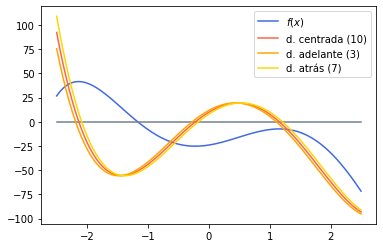

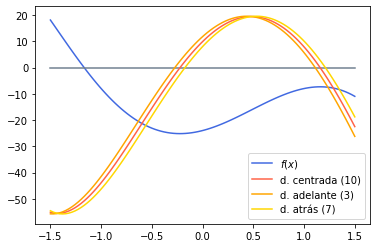

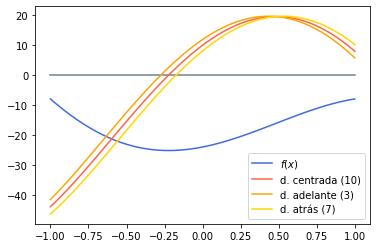

In [33]:
# Ejercicio 5


f = lambda x: x**5 - 3*x**4 - 11*x**3 + 19*x**2 + 10*x - 24
h = 0.1

def representar_funcion(ab):
    # Función
    x = np.linspace(ab[0], ab[1], 100)
    y = f(x)
    plt.plot(x, y, color="royalblue", label="$f(x)$")

    # Eje x
    x0 = np.linspace(ab[0], ab[1], 10)
    y0 = np.zeros(10)
    plt.plot(x0, y0, color="slategray")

    # Derivación centrada
    y_dc = diferencia_centrada(f, x, h)
    plt.plot(x, y_dc, color="tomato", label="d. centrada (10)")

    # Derivación hacia adelante
    y_ad = diferencia_hacia_adelante(f, x, h)
    plt.plot(x, y_ad, color="orange", label="d. adelante (3)")

    # Derivación hacia atrás
    y_at = diferencia_hacia_atras(f, x, h)
    plt.plot(x, y_at, color="gold", label="d. atrás (7)")

    plt.legend()
    plt.show()

representar_funcion((-2.5, 2.5))
representar_funcion((-1.5, 1.5))
representar_funcion((-1.0, 1.0))